# Simulation of Widget-Adjustable Parametric Circuit

Suppose you are interested in printing out the state vector
of a quantum circuit at various times (points) in its evolution, as well
as at the end of the circuit. Qubiter can do that.

Furthermore, suppose that the circuit is a parametric one, and you want to
vary its parameters using sliders on a gui (graphical user interface).
Qubiter can do that too, via a jupyter notebook with widgets.
This notebook is one such notebook. 


A jupyter
notebook with widgets gives you
the best of both worlds, the gui world and the notebooks world.

Gui's excel at reducing the possibility of user errors, increasing the ease of use for the user,
and reducing the amount of understanding of the code 
that is demanded from the user in order for him or her to use 
the code correctly.

Notebooks excel at providing a robust, flexible, ready made, familiar method of documenting
and saving your work for multiple use cases. They are also great for 
explaining your work to others with great detail and precision.

In [1]:
# cd to the Qubiter directory and add it to your path environmental variable
import os
import sys
print(os.getcwd())
os.chdir('../../')
print(os.getcwd())
sys.path.insert(0,os.getcwd())

/home/rrtucci/PycharmProjects/qubiter/qubiter/jupyter_notebooks
/home/rrtucci/PycharmProjects/qubiter


We will first construct the quantum
circuit that we are interested in studying.

Note that we insert a PRINT statement at each point 
at which we want a printout of
the state vector (except at the end point which has an implicit PRINT
statement). 

Note also that 
the angles for some gates are special strings 
with hash characters in them instead of floats.
These placeholder variable or parameter
strings have been explained elsewhere,
in another jupyter notebook.

A PRINT statement in the 'ALL' style will
print out a bunch of text info about the state vector
at the point in the evolution where the print statement is located.
The 'ALL+' style will printout
everything that the 'ALL' style prints out, plus it
prints a bar graph of the probability 
associated with each component of the state vector.

In [2]:
from qubiter.jupyter_notebooks.utilities_nb import run_sim_gui
from qubiter.SEO_writer import *

loaded OneQubitGate, WITHOUT autograd.numpy


In [3]:
num_qbits = 3
file_prefix = 'widgets_simulation_test'

emb = CktEmbedder(num_qbits, num_qbits)
wr = SEO_writer(file_prefix, emb)
wr.write_Ry(0, rads='#1*.5')
wr.write_Ry(1, rads='#2*.5')
wr.write_cnot(0, 1)
wr.write_PRINT('ALL+')
wr.write_Ry(0, rads='#3*.5')
wr.write_Ry(1, rads='#4*.5')
wr.write_cnot(0, 1)
wr.write_PRINT('ALL+')

trols = Controls(num_qbits)
trols.bit_pos_to_kind = {0:True, 1:False}
trols.refresh_lists()
wr.write_controlled_one_qbit_gate(2, trols,
                                 OneQubitGate.rot_ax, ['fun#1#3', 1])

wr.close_files()

In [4]:
# We can ask wr to print the English file just created
wr.print_eng_file(jup=True)

1,ROTY #1*.5 AT 0,2,ROTY #2*.5 AT 1,3,SIGX AT 1 IF 0T,4,PRINT ALL+,5,ROTY #3*.5 AT 0,6,ROTY #4*.5 AT 1,7,SIGX AT 1 IF 0T,8,PRINT ALL+,9,ROTX fun#1#3 AT 2 IF 1F 0T


All the gui code is prepackaged and
included in a method called `run_sim_gui()`
included in the file `utilities_nb.py`

In [5]:
# We can ask wr to print the Picture file just created
wr.print_pic_file(jup=True)

1,| | Ry,2,| Ry |,3,| X---@,4,PRINT ALL+,5,| | Ry,6,| Ry |,7,| X---@,8,PRINT ALL+,9,Rx--O---@


This is a static jpeg showing what the widgets look like. A new, different interactive javascript rendering of the widgets will be generated when you run the notebook. To generate this cell, I: 
1. printed the computer screen, and then cropped the image with Gimp to produce the final jpeg
2. made this cell a markdown cell, and then drag&dropped the final jpeg into this cell
3. added these instructions at the top of the cell
4. ran this cell
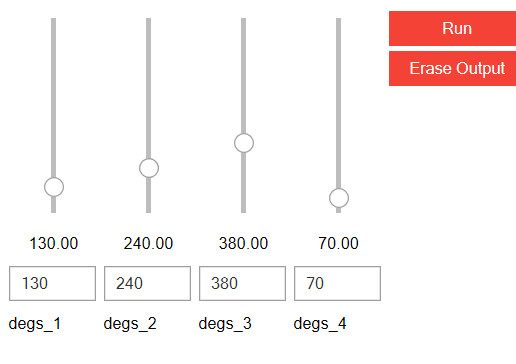

degs_1 = 130.000000 (2.268928 rads)
degs_2 = 240.000000 (4.188790 rads)
degs_3 = 380.000000 (6.632251 rads)
degs_4 = 70.000000 (1.221730 rads)

*************************beginning PRINT output
PRINT line number=4
*********branch= pure
state vector:
ZL convention (Zero bit Last in state tuple)
(000)ZL (-0.211309 + 0.000000j)	 prob=0.044652
(010)ZL (-0.365998 + 0.000000j)	 prob=0.133955
(001)ZL ( 0.784886 + 0.000000j)	 prob=0.616045
(011)ZL ( 0.453154 + 0.000000j)	 prob=0.205348
total probability of state vector (=one if no measurements)= 1.000000
dictionary with key=qubit, value=(Prob(0), Prob(1))
{0: (0.178606, 0.821394), 1: (0.660697, 0.339303), 2: (1.0, 0.0)}


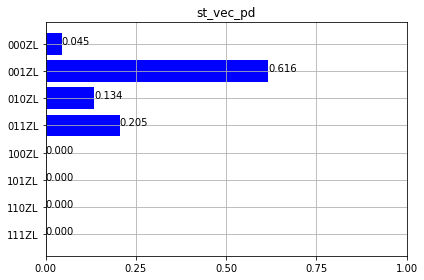

****************************ending PRINT output

*************************beginning PRINT output
PRINT line number=8
*********branch= pure
state vector:
ZL convention (Zero bit Last in state tuple)
(000)ZL ( 0.220423 + 0.000000j)	 prob=0.048586
(010)ZL ( 0.189609 + 0.000000j)	 prob=0.035952
(001)ZL ( 0.046775 + 0.000000j)	 prob=0.002188
(011)ZL (-0.955654 + 0.000000j)	 prob=0.913274
total probability of state vector (=one if no measurements)= 1.000000
dictionary with key=qubit, value=(Prob(0), Prob(1))
{0: (0.084538, 0.915462), 1: (0.050774, 0.949226), 2: (1.0, 0.0)}


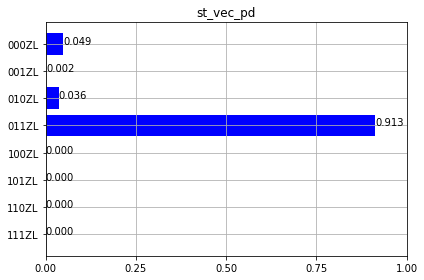

****************************ending PRINT output

-----------------------------beginning final results
*********branch= pure
state vector:
ZL convention (Zero bit Last in state tuple)
(000)ZL ( 0.220423 + 0.000000j)	 prob=0.048586
(010)ZL ( 0.189609 + 0.000000j)	 prob=0.035952
(001)ZL ( 0.015154 + 0.000000j)	 prob=0.000230
(101)ZL ( 0.000000 + 0.044252j)	 prob=0.001958
(011)ZL (-0.955654 + 0.000000j)	 prob=0.913274
total probability of state vector (=one if no measurements)= 1.000000
dictionary with key=qubit, value=(Prob(0), Prob(1))
{0: (0.084538, 0.915462), 1: (0.050774, 0.949226), 2: (0.998042, 0.001958)}


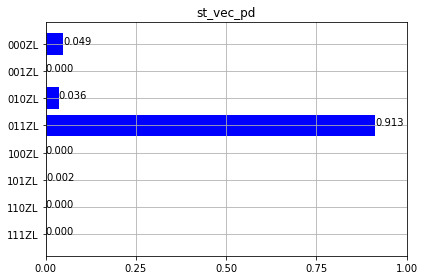

-----------------------------ending final results



In [8]:
all_var_nums = [1, 2, 3, 4]
def fun(a, b):
    return a*b*.5
fun_name_to_fun = {'fun': fun}

# re-run this cell if you change the arguments of run_sim_gui()
%matplotlib inline
run_sim_gui(file_prefix, num_qbits, all_var_nums, fun_name_to_fun=fun_name_to_fun, 
            append_new=True, sty_fin_desc='ALL+')